# Projet 2 :Analysez des données de systèmes éducatifs

### Enoncé:
Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

Quels sont les pays avec un fort potentiel de clients pour nos services ?
Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
Dans quels pays l'entreprise doit-elle opérer en priorité ?


# La mission
Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :

Hello,

Les données de la Banque mondiale sont disponibles à l’adresse suivante :

https://datacatalog.worldbank.org/dataset/education-statistics

Ou en téléchargement direct à ce lien.

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :

http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :

Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

## Importation des données 

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

les données se composent de 5 fichiers du type csv. A partir de ces fichiers, on crée 5 nouvelles dataframes.

In [2]:
#création de 5 nouvelles tables.
country=pd.read_csv('EdStatsCountry.csv')
country_series=pd.read_csv('EdStatsCountry-Series.csv')
data=pd.read_csv('EdStatsData.csv')
footnote=pd.read_csv('EdStatsFootNote.csv')
series=pd.read_csv('EdStatsSeries.csv')

In [263]:
#Pour afficher plus de lignes et de colonnes
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',70)

###  Description du jeu de données

###  la table country

In [3]:
# Affichons les premiers lignes du dataframe
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [257]:
country.shape

(241, 32)

Cette table est composée de 241 lignes qui correpondent aux pays et de 32 colonnes qui donnent des informations sur les pays.

In [5]:
country.dtypes.value_counts()

object     28
float64     4
dtype: int64

<AxesSubplot:>

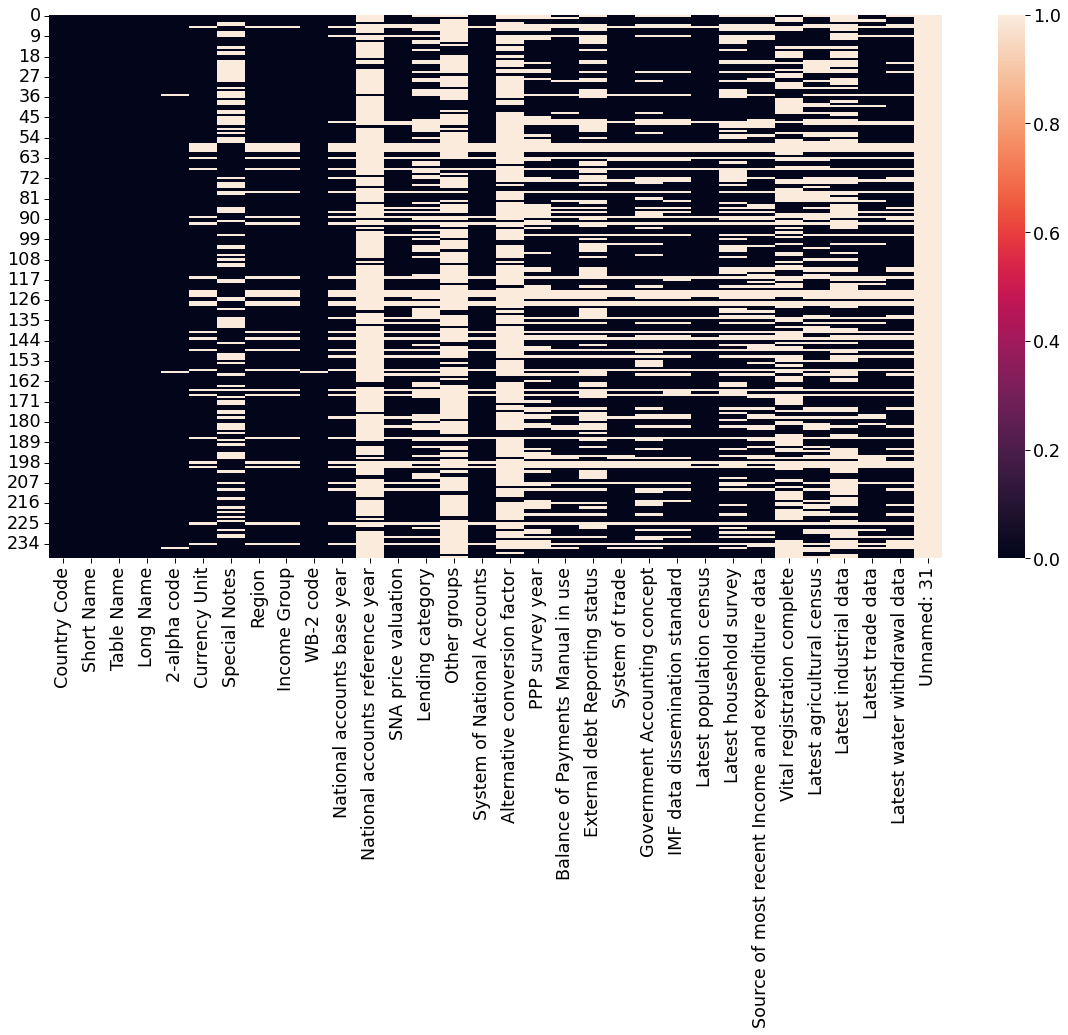

In [260]:
plt.figure(figsize=(20,10))
sns.heatmap(country.isna())

In [6]:
country.isnull().sum().sort_values(ascending= True)

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
WB-2 code                                              1
2-alpha code                                           3
System of National Accounts                           26
Currency Unit                                         26
Region                                                27
Income Group                                          27
Latest population census                              28
National accounts base year                           36
System of trade                                       41
SNA price valuation                                   44
Latest trade data                                     56
IMF data dissemination standard                       60
Balance of Payments Manual in use                     60
Latest water withdrawal data   

In [7]:
print('il y a', country.isnull().sum().sum(), 'valeurs manquantes dans cette table')

il y a 2354 valeurs manquantes dans cette table


#### les doublons

In [8]:
country.duplicated('Country Code').sum()

0

Il n'a pas de doublons dans cette table 

###  la table country_series

In [9]:
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [10]:
country_series.shape

(613, 4)

La table se compose de 613 lignes et de 4 colonnes. Elle donne les informations sur les sources des indicateurs.

In [11]:
country_series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [12]:
country_series.dtypes.value_counts()

object     3
float64    1
dtype: int64

<AxesSubplot:>

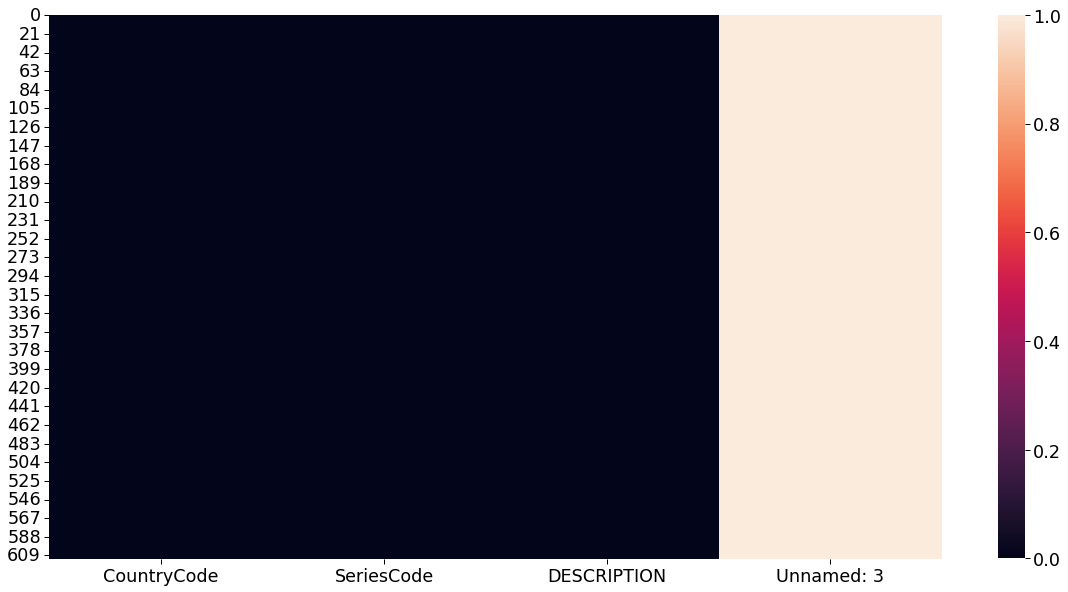

In [261]:
#affichons la répartition de données sur un graphique:
plt.figure(figsize=(20,10))
sns.heatmap(country_series.isna())

In [13]:
country_series.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [14]:
country_series.duplicated(['CountryCode','SeriesCode']).sum()

0

Cette table comprend 3 variables de type 'object' et une variable de type 'float'. Elle contient 613 valeurs manquantes et n'a pas de doublons.

### la table data

In [15]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.shape

(886930, 70)

La table data est composé de 886930 lignes et de 70 colonnes. Chaque ligne correspond à un indicateur pour un pays et sur les colonnes, on retrouve les années. 

In [17]:
data.dtypes.value_counts()

float64    66
object      4
dtype: int64

In [266]:
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822


In [19]:
data.isnull().sum().sum()

53455179

Cette table 'data' se compose de 66 variables de type float et de ' variables de type object. Elle comprend 53455179 données manquantes. on peut voir la repartition de ces données manquantes sur le graphique qui suivant

<AxesSubplot:>

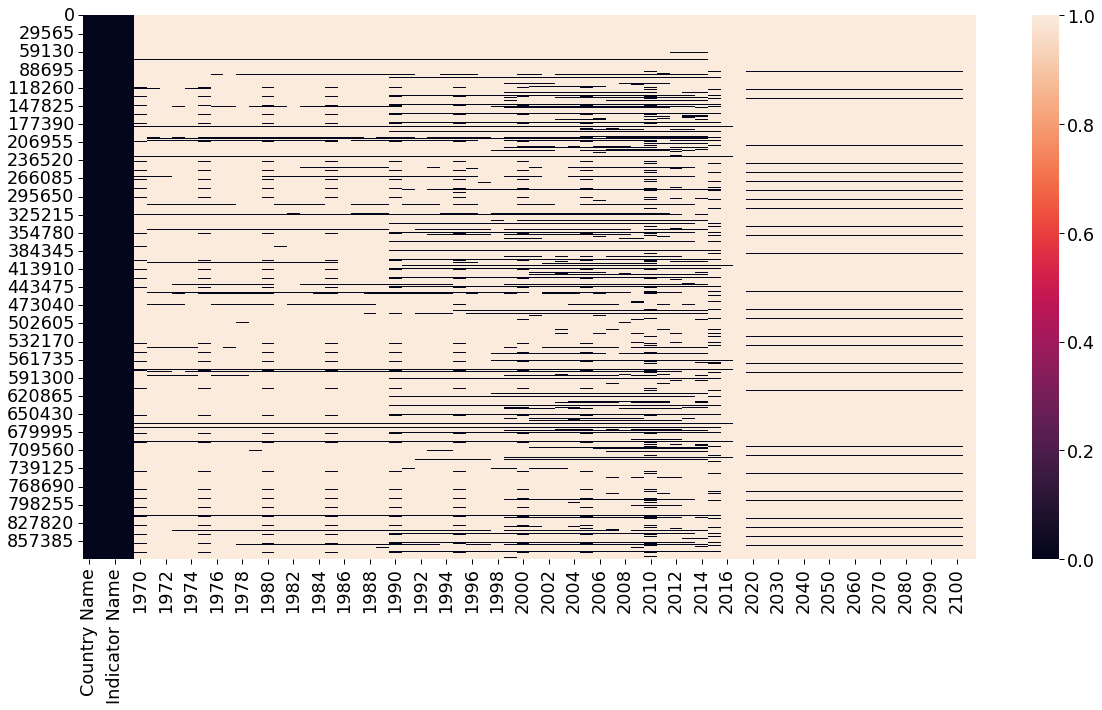

In [253]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

Mesurons les pourcentage de valeurs manquantes dans nos colonnes. Et trions les par ordre croissant.

In [264]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending=True)

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.726650
2005              0.792421
2000              0.800801
2012              0.833962
2011              0.835374
2009              0.839775
2006              0.841800
2013              0.844961
2007              0.845228
2008              0.848481
1995              0.851892
2015              0.852234
2003              0.853018
2004              0.854764
1990              0.859735
2002              0.859961
2001              0.860745
1999              0.866011
2014              0.871705
1985              0.898193
1980              0.899516
1975              0.901564
1998              0.904261
1994              0.912663
1996              0.913401
1993              0.914545
1992              0.914826
1991              0.916073
1997              0.917183
1970              0.918496
2040              0.942007
2025              0.942007
2090              0.942007
2

On remarque qu'on a plusieurs lignes avec plus de 90% de valeurs manquantes. l'année 2017 par exemple ne comporte pas beaucoup de  valeurs.

In [22]:
data.duplicated(['Country Code','Indicator Code']).sum()

0

On ne remarque aucun doublon dans cette table

### La table 'footnote'

In [23]:
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [24]:
footnote.shape

(643638, 5)

Cette table qui se compose de 643638 lignes et de 5 colonnes donne certaines présicions sur les indicateurs.

In [25]:
footnote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [26]:
footnote.duplicated(['CountryCode', 'SeriesCode', 'Year']).sum()

0

In [27]:
footnote.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

### La table 'series'

In [28]:
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
series.shape

(3665, 21)

Cette table 'series' qui comprend 3665 lignes et 21 colonnes donne des renseignements sur chaque indicateurs

In [30]:
series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [31]:
series.dtypes.value_counts()

object     15
float64     6
dtype: int64

In [32]:
series.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [33]:
series.isnull().sum().sum()

55203

In [34]:
series.duplicated('Series Code').sum()

0

La table 'serie' qui se compose de 15 variables de type 'object'et 6 variables de type 'float', a un total de 55203 valeurs manquantes et n'a pas de doublon.

## le choix des indicateurs 

Différentes questions nous ont été posées: "Quels sont les pays avec un fort potentiel de clients pour nos services ? Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ? Dans quels pays l'entreprise doit-elle opérer en priorité ?"

Après une analyse des différents fichiers que comporte notre base de données, nous avons choisit de nous concentrer sur la table 'Data'.

<AxesSubplot:>

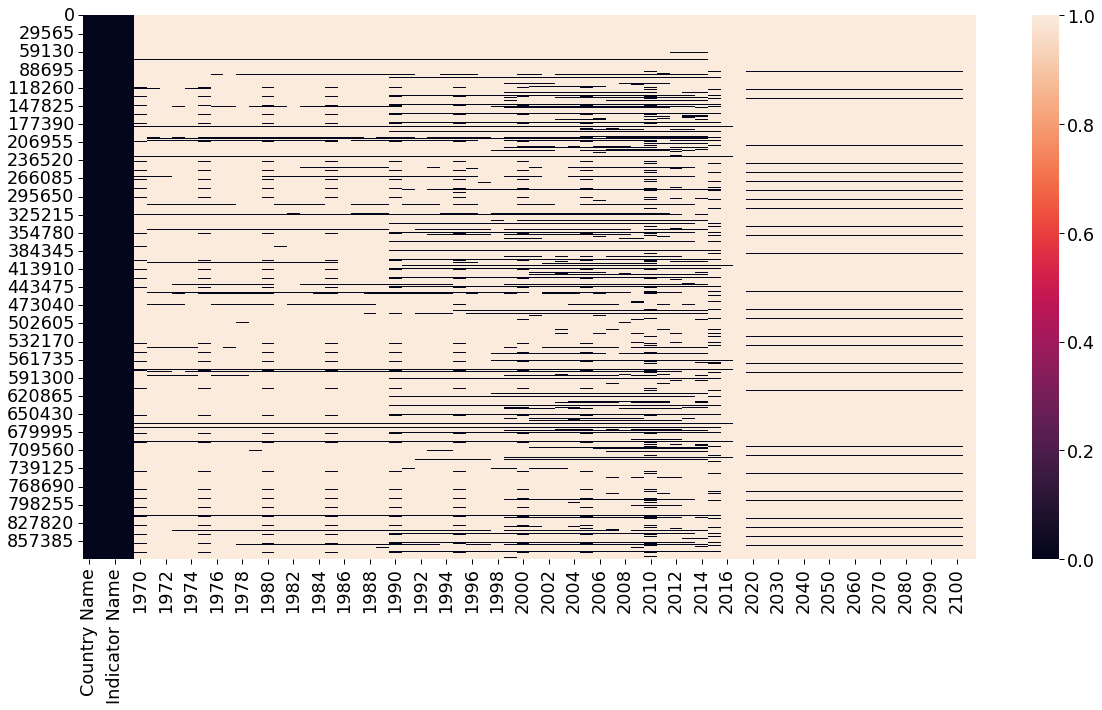

In [265]:
# graphique sur le remplissage des données 
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

Pour la suite de notre analyse, nous choisissons de garder les données des années 2010 à 2015

In [36]:
#pour afficher les resultats en entier
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',70)

### les indicateurs pertinents:

Parmis les indicateurs, nous devons sélectionner ceux qui nous permettrons de répondre à notre probématique. Nous rapellons que ces indicateurs doivent concerner le public visé(lycée, université), le nombre de professeurs disponibles, l'accès à internet et les possibilités de financement. 

Les indicateurs selectionnées sont: 
- Pour le public cible:

   - Population, ages 15-24 ans (number) SP.POP.1524.TO.UN
   - Enrolment in upper secondary education, both sexes (number): UIS.E.3 
   - Enrolment in post-secondary non-tertiary education, both sexes (number):UIS.E.4 

- Pour le deploiement d'internet:
   - Internet users (per 100 people): IT.NET.USER.P2 
- Pour les besoins d'enseignants:

   - Pupil- teacher ratio in upper secondary (headcount basis):UIS.PTRHC.3 
   - Pupil-teacher ratio in tertiary UIS.PTRHC.56 
- Pour l'aspect economique: 
  - GDP per capita (current US$): NY.GDP.PCAP.CD

In [ ]:
#Création d'une liste evec les indicateurs choisisles indicateurs pertinents:
indicateurs=['IT.NET.USER.P2' 'NY.GDP.PCAP.CD', 'SP.POP.1524.TO.UN', 'UIS.E.3','UIS.E.4', 'UIS.PTRHC.56']

In [267]:
#selection des lignes contenant les indicateurs choisis
ind=data.loc[(data['Indicator Code'].isin(indicateurs)),:]
ind.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1171,Arab World,ARB,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350084e+05,2.588534e+05,2.924517e+05,3.078271e+05,3.280537e+05,329805.25,3.138178e+05,308639.25,2.905856e+05,2.742247e+05,248527.25,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6872654.0,7077449.5,7088867.0,7530443.5,7945379.000,8190411.500,8.554936e+06,9.096402e+06,9.393456e+06,1.018652e+07,1.074748e+07,10739526.00,1.070008e+07,10374816.00,1.030286e+07,1.017877e+07,10644779.00,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,Arab World,ARB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2553,Arab World,ARB,Pupil-teacher ratio in tertiary education (hea...,UIS.PTRHC.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4836,East Asia & Pacific,EAS,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950217.375,1953021.625,1.870913e+06,1.692694e+06,1.838077e+06,1.774016e+06,1.773494e+06,1698924.25,1.589631e+06,1575163.75,1.837959e+06,1.911065e+06,1919563.00,1.847882e+06,1.735663e+06,2.779837e+06,3.231800e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#On peut créer un copie de la table 'ind'
table_ind=ind.copy()

In [39]:
#affichons les colonnes de cette table
table_ind.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [268]:
#Nous pouvons selectionner les colonnes comprenant les années les plus renseignées: de 2010-2015
table_ind=table_ind[['Country Name','Country Code', 'Indicator Name', 'Indicator Code','2010', '2011', '2012', '2013', '2014','2015']]
table_ind.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
1171,Arab World,ARB,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.485272e+05,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN
1214,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN
2482,Arab World,ARB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN


Il serait pertinent d'inclure la variable 'région' de la table 'country' dans notre analyse.

In [269]:
# Création d'un nouveau datafarame comprenant le code des pays et les régions
country_region=country[['Country Code','Region']]
country_region.head()

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia


In [42]:
#faisons une jointure de la table "table_ind" et de la table "country_region"
df_new=pd.merge(table_ind, country_region, on='Country Code', how= 'outer')
df_new.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region
0,Arab World,ARB,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.485272e+05,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN,NaN
1,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN,NaN
2,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN,NaN
3,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN
4,Arab World,ARB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df=df_new.copy()

##### Suppression des pays sous représentés

In [272]:
#faisons une agrégation qui compte le nombre d'indicateurs par pays en fonction des années
etat=df_new.groupby('Country Code')['2010', '2011', '2012', '2013', '2014','2015'].count()
etat.head(50)

C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\794513747.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  etat=df_new.groupby('Country Code')['2010', '2011', '2012', '2013', '2014','2015'].count()


,2010,2011,2012,2013,2014,2015
Country Code,,,,,,
ABW,5,5,4,3,3,3
AFG,5,6,5,5,6,3
AGO,4,5,3,3,3,4
ALB,4,5,4,6,6,3
AND,4,3,4,5,5,3
ARB,4,4,4,4,2,0
ARE,4,5,5,5,5,4
ARG,4,4,4,4,3,3
ARM,5,5,5,5,5,4


On remarque que certains pays n'ont aucun indicateur renseigné. On peut donc suprimmer ces pays là.

In [273]:
#on decide de supprimer des pays et de ne garder que ceux qui ont au moins 3 indicateurs
pays_a_sup=etat[etat['2010'] <=2].index
print("les codes des pays à suppimer sont: " ,pays_a_sup.tolist())

les codes des pays à suppimer sont:  ['ASM', 'CHI', 'CUW', 'CYM', 'FRO', 'GIB', 'GRL', 'GUM', 'IMN', 'KIR', 'MAF', 'MHL', 'MNP', 'NCL', 'NRU', 'PLW', 'PRK', 'PYF', 'SMR', 'SOM', 'SSD', 'SXM', 'TCA', 'TUV', 'VGB', 'VIR', 'XKX']


In [46]:
#on supprime les pays contenus dans la liste précedente.
df=df[~df['Country Code'].isin(pays_a_sup)]

In [47]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region
0,Arab World,ARB,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.485272e+05,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN,NaN
1,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN,NaN
2,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN,NaN
3,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN
4,Arab World,ARB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### les ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques du monde 

Dans cette partie, nous allons utiliser les informations de l'année 2010. Nous avons vu précedemment que la cette colonne etait la plus renseignée.

In [290]:
#On pourait restructurer notre tableau avec les pays et les région en index, et les indicateurs en colonne
new_table= df.pivot_table( index=['Country Name', 'Region'], columns= 'Indicator Code', values='2010')
new_table.head(50)

,Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,SP.POP.1524.TO.UN,UIS.E.3,UIS.E.4,UIS.PTRHC.56
Country Name,Region,,,,,,
Afghanistan,South Asia,4.00,553.300289,6090239.0,567344.0,51694.0,NaN
Albania,Europe & Central Asia,45.00,4094.358832,608456.0,140657.0,NaN,NaN
Algeria,Middle East & North Africa,12.50,4463.394675,7245764.0,1306432.0,NaN,28.763540
Andorra,Europe & Central Asia,81.00,39736.354063,NaN,1221.0,1027.0,NaN
Angola,Sub-Saharan Africa,2.80,3529.053482,3774989.0,283340.0,NaN,NaN
Antigua and Barbuda,Latin America & Caribbean,47.00,12174.697859,NaN,2537.0,923.0,6.763010
Argentina,Latin America & Caribbean,45.00,10276.260498,6828321.0,1520478.0,NaN,NaN
Armenia,Europe & Central Asia,25.00,3218.381655,573480.0,97080.0,NaN,9.223320
Aruba,Latin America & Caribbean,62.00,24271.940421,13299.0,3913.0,NaN,10.401790


In [49]:
new_table.reset_index()

Indicator Code,Country Name,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,SP.POP.1524.TO.UN,UIS.E.3,UIS.E.4,UIS.PTRHC.56
0,Afghanistan,South Asia,4.00,553.300289,6090239.0,567344.0,51694.0,NaN
1,Albania,Europe & Central Asia,45.00,4094.358832,608456.0,140657.0,NaN,NaN
2,Algeria,Middle East & North Africa,12.50,4463.394675,7245764.0,1306432.0,NaN,28.76354
3,Andorra,Europe & Central Asia,81.00,39736.354063,NaN,1221.0,1027.0,NaN
4,Angola,Sub-Saharan Africa,2.80,3529.053482,3774989.0,283340.0,NaN,NaN
...,...,...,...,...,...,...,...,...
185,Vietnam,East Asia & Pacific,30.65,1333.583524,18421533.0,NaN,NaN,29.03685
186,West Bank and Gaza,Middle East & North Africa,37.40,2338.719877,879328.0,152148.0,NaN,27.18819
187,"Yemen, Rep.",Middle East & North Africa,12.35,1309.231960,5359034.0,585649.0,NaN,NaN
188,Zambia,Sub-Saharan Africa,10.00,1463.213573,2720387.0,NaN,NaN,NaN


In [50]:
new_table.columns

Index(['IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 'SP.POP.1524.TO.UN', 'UIS.E.3',
       'UIS.E.4', 'UIS.PTRHC.56'],
      dtype='object', name='Indicator Code')

In [299]:
table=new_table.copy()

In [300]:
#Nous pouvons renommer les colonnes por faciliter la lecture:
#'IT.NET.USER.P2':'Accès internet %',
#'NY.GDP.PCAP.CD': 'PIB/hbts',
#'SP.POP.1524.TO.UN': '15-24ans', 
#'UIS.E.3':'Scolarisation lycée',
#'UIS.E.4':'Scolarisation université',
#'UIS.PTRHC.56':'Ratio prof/élèves'
table=table.rename(columns={'IT.NET.USER.P2':'Accès internet %','NY.GDP.PCAP.CD': 'PIB/hbts','SP.POP.1524.TO.UN': '15-24ans', 'UIS.E.3':'Scolarisation lycée','UIS.E.4':'Scolarisation université','UIS.PTRHC.56':'Ratio prof/élèves' })
table.columns

Index(['Accès internet %', 'PIB/hbts', '15-24ans', 'Scolarisation lycée',
       'Scolarisation université', 'Ratio prof/élèves'],
      dtype='object', name='Indicator Code')

In [301]:
table=table.reset_index()

In [302]:
table=table.fillna(0)

In [278]:
#création d'une liste comprenant les colonnes du tableau
colonnes=['Accès internet %', 'PIB/hbts', '15-24ans', 'Scolarisation lycée','Scolarisation université', 'Ratio prof/élèves']

###### Tableau des moyennes, des medianes et des ecarts type de chaque indicateurs par zones géographiques

In [306]:
#affichons pour chaque indicateur, la moyenne, la mediane et l'ecart-type par zone géographique
for col in colonnes:
    region=pd.DataFrame()
    region=(table.groupby('Region').agg({ col : ['mean','median','std']}))
    print(region)

Indicator Code             Accès internet %                   
                                       mean  median        std
Region                                                        
East Asia & Pacific               32.620308  21.200  29.446810
Europe & Central Asia             57.682745  62.120  24.275722
Latin America & Caribbean         34.584000  34.770  14.777032
Middle East & North Africa        36.374181  36.800  22.012558
North America                     78.733333  80.300   6.405344
South Asia                        10.407500   7.965   7.359128
Sub-Saharan Africa                 7.614783   4.235   8.660896
Indicator Code                  PIB/hbts                            
                                    mean        median           std
Region                                                              
East Asia & Pacific         14243.678810   3500.751348  18385.805453
Europe & Central Asia       29156.070152  14638.604817  33013.233144
Latin America & Caribbean

Nous pouvons affiché les mesures de dispertion par zone géographique et par indicateur à l'aide d'une boite à moustache

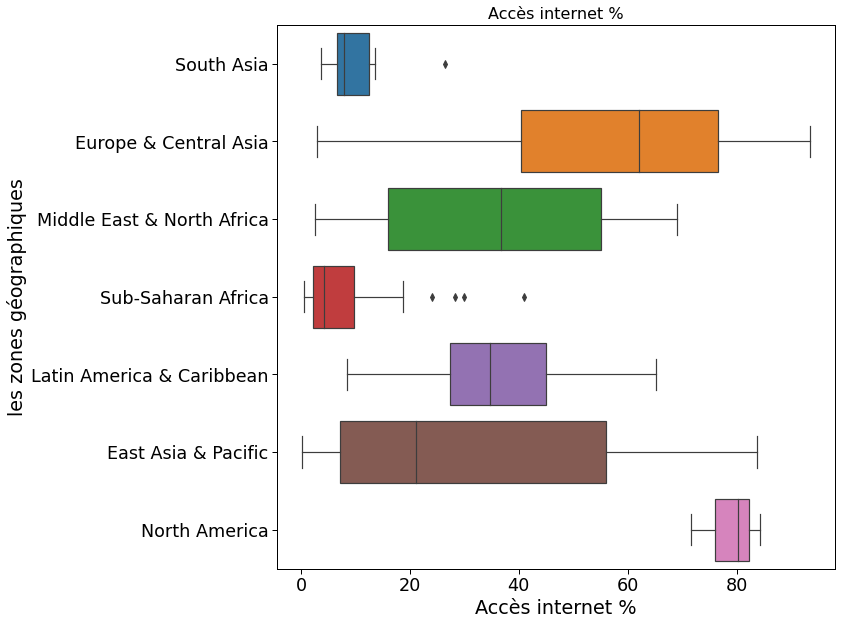

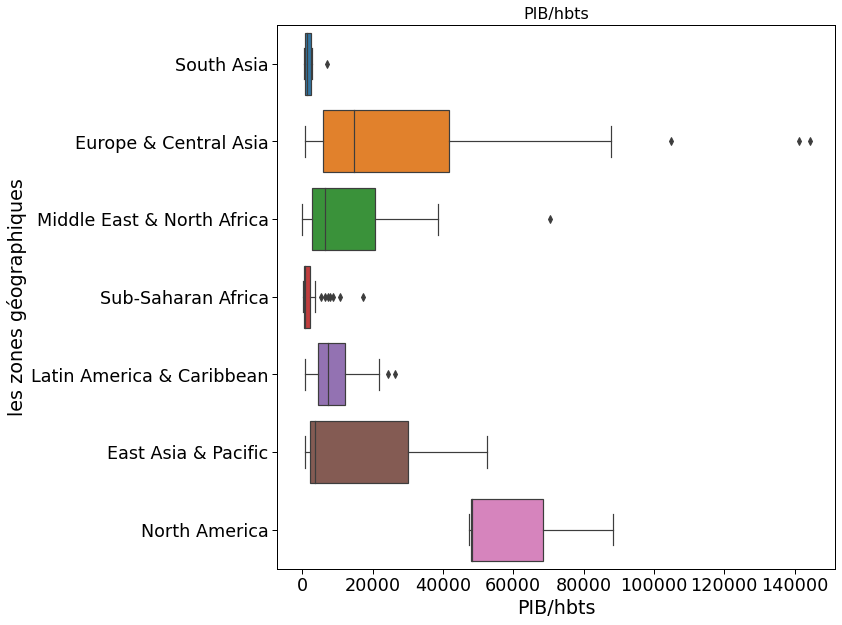

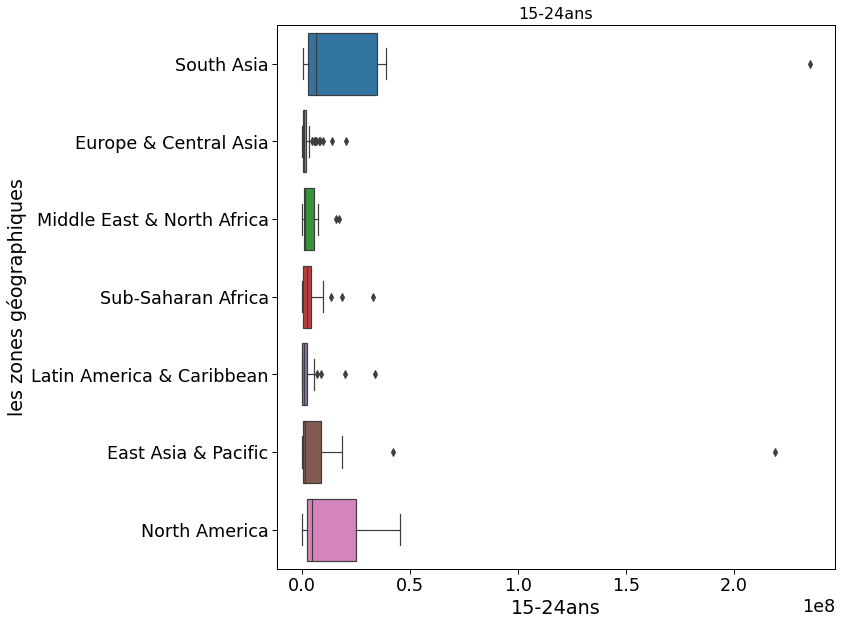

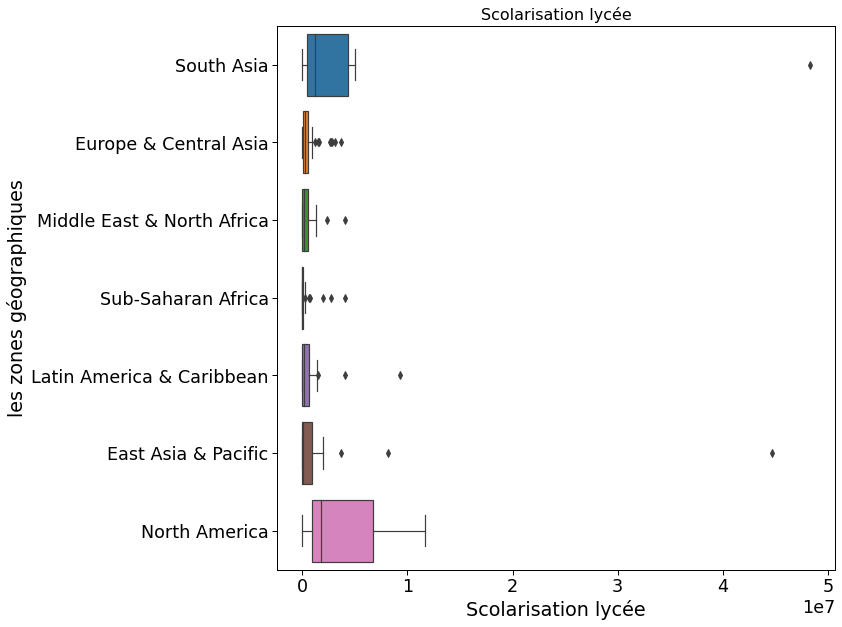

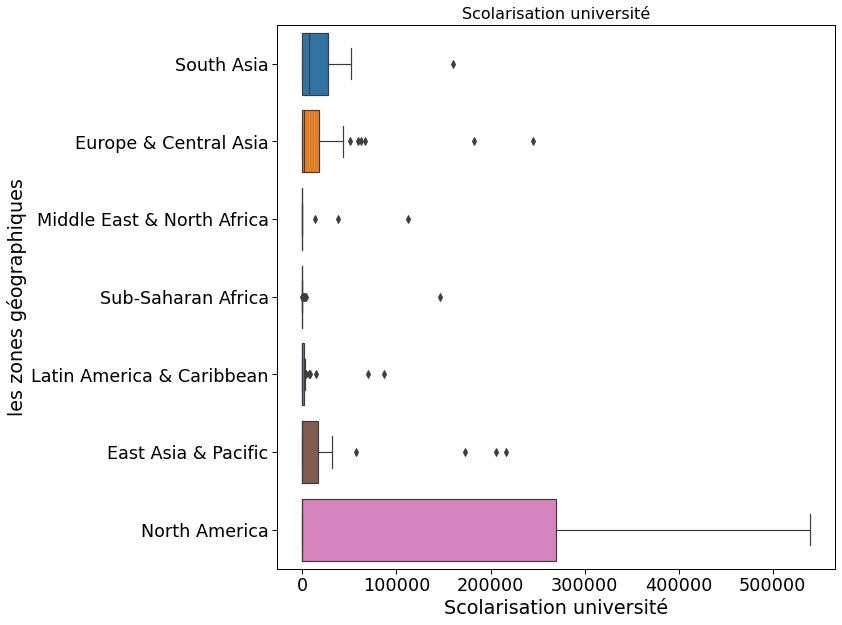

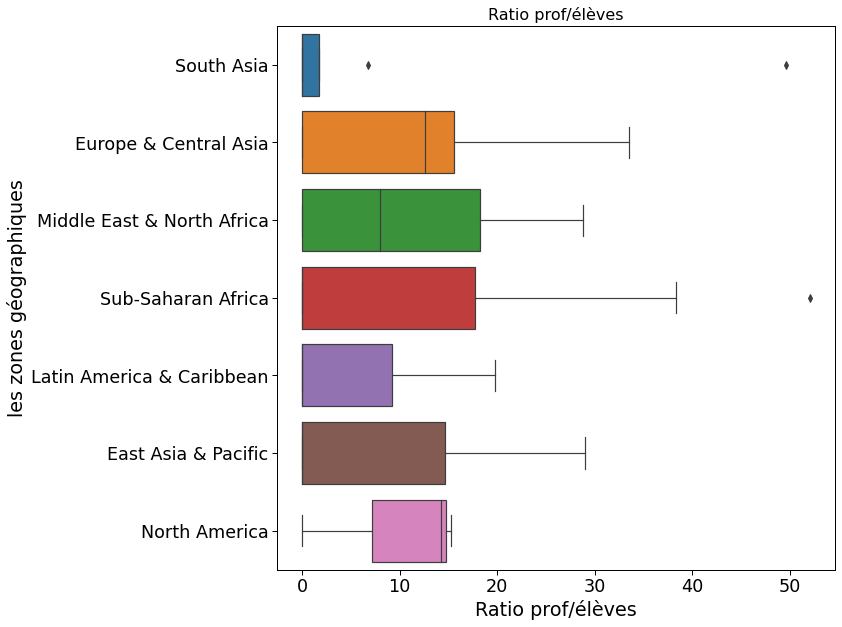

In [304]:
for col in colonnes:
    plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 14})
    sns.boxplot(data=table, x=col, y='Region')
    plt.ylabel('les zones géographiques')
    plt.title(col , fontsize=16)
    

In [307]:
moyenne_region=table.groupby('Region').mean()
moyenne_region.head(10)

Indicator Code,Accès internet %,PIB/hbts,15-24ans,Scolarisation lycée,Scolarisation université,Ratio prof/élèves
Region,,,,,,
East Asia & Pacific,32.620308,14243.678810,1.361625e+07,2.466441e+06,29189.615385,7.597393
Europe & Central Asia,57.682745,29156.070152,2.375721e+06,5.795996e+05,19045.901961,10.582836
Latin America & Caribbean,34.584000,8790.568575,2.999690e+06,6.564536e+05,5647.971429,4.434562
Middle East & North Africa,36.374181,14740.621576,3.633741e+06,5.455160e+05,7767.333333,9.576612
North America,78.733333,61342.894133,1.654476e+07,4.505350e+06,179705.000000,9.827837
South Asia,10.407500,2042.468922,4.038320e+07,7.543389e+06,30655.250000,7.040046
Sub-Saharan Africa,7.614783,2264.269135,3.807617e+06,2.544202e+05,3419.500000,9.844369


##### graphiques sur la repartition moyenne des indicateurs par zones géographiques

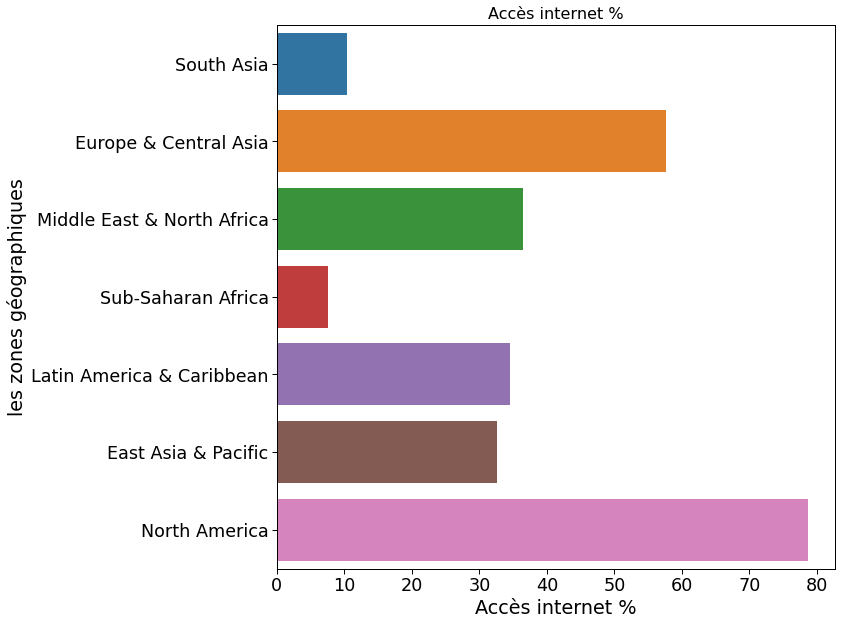

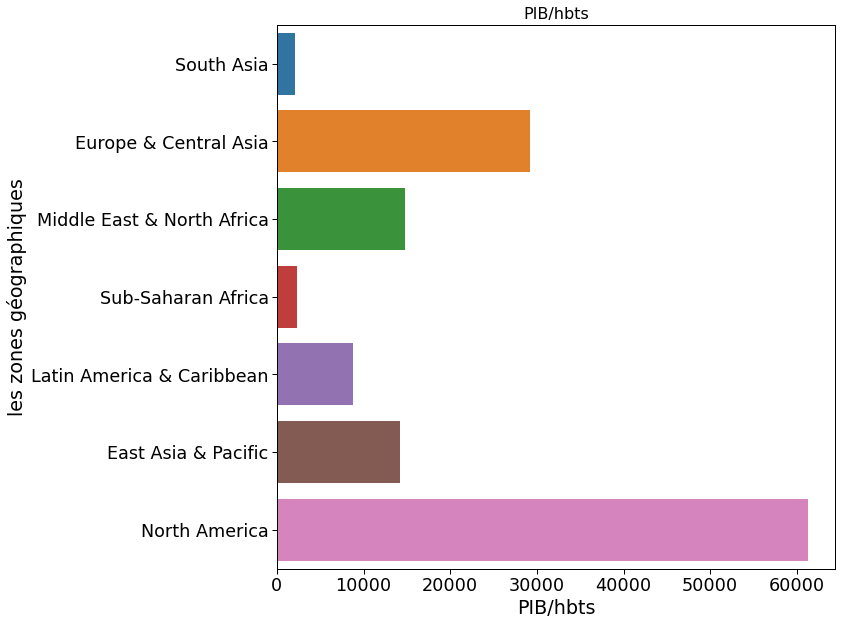

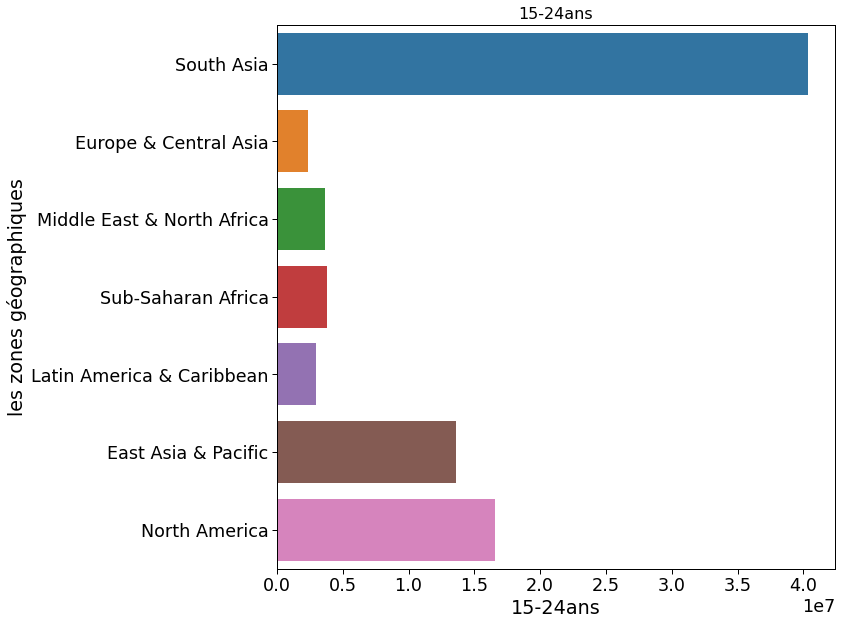

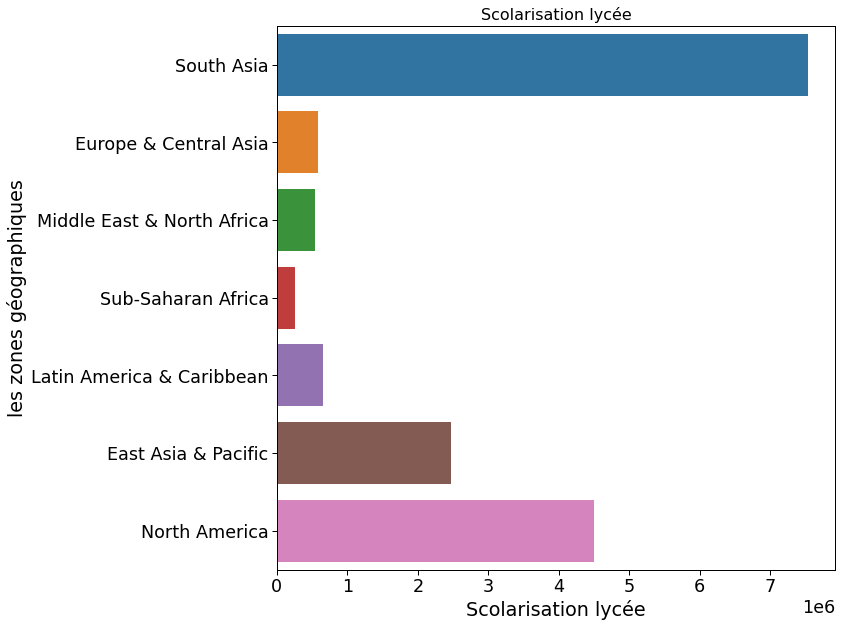

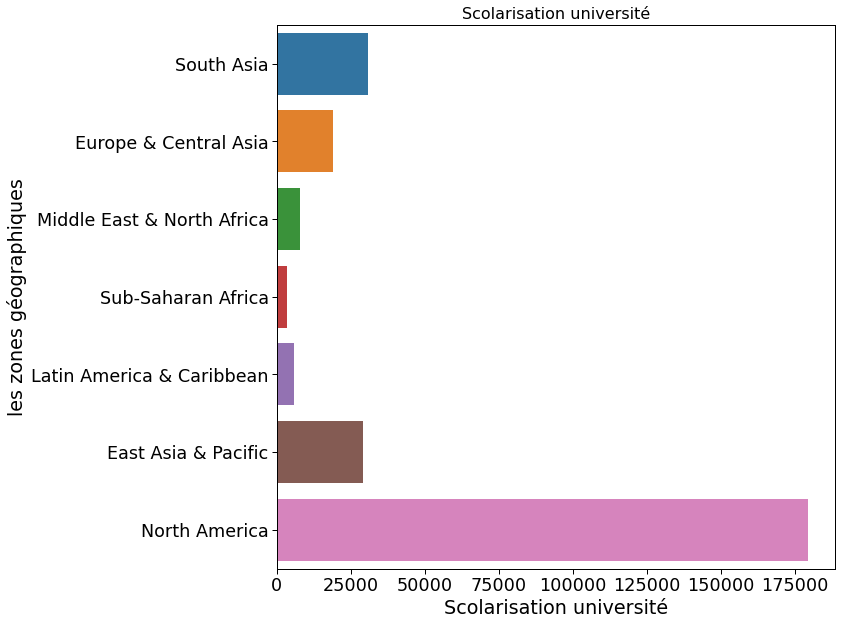

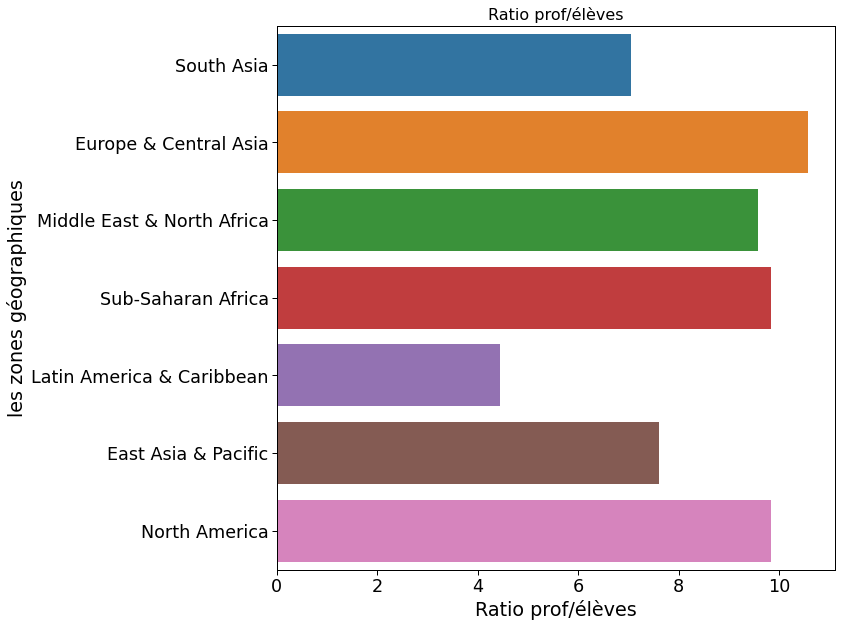

In [281]:
for col in colonnes:
    plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 14})
    sns.barplot(data=table, x=col, y='Region', estimator= np.mean, ci=None)
    plt.ylabel('les zones géographiques')
    plt.title(col , fontsize=16)
    

Sur les graphiques précédents, on peut remarquer ces differents éléments:
- les pays d'Asie du sud ont une forte population  de jeunes. Cette population peut représenter notre public cible. Mais l'accès à internet et les moyens financiers sont limités dans ces pays.
- les pays situés en Amerique du nord et en Europe ont un PIB par habitants et un taux d'utilisation d'internet supérieur aux autres pays.

### Détermination des pays à fort potentiel pour nos services

L'entreprise propose des cours en ligne destinés aux lycéens et aux étudiants. On peut créer une nouvelle variable regroupant pour chaque pays, les élèves scolarisés au lycée et les étudiants.

In [313]:
#création de la variable cible
table['cible']=table['Scolarisation lycée']+table['Scolarisation université']

#####      *      Les critères de sélection

Les critères de selection des pays à fort potentiel pour nos services sont les suivants:
- Un bon pourcentage d'accès à internet,
- Un PIB/ habitant élevé.
- Un public cible élevé,


Pour selectionner ces pays, nous allons céer 3 scores qui auront des valeurs comprises entre 0 et 1:
- un score_pu, pour notre le public cible,
- un score_fi, pour la capacité de financement,
- un score_fp, qui prend en compte les trois critères énoncés selon la répartition suivante: 
    . 40% Accès à internet
    . 40% Score_fi
    . 20% public cible

In [315]:
#création du score concernant le public cible: "Score_pu"
table['Score_pu']=table['cible']/table['cible'].max()

In [316]:
#Création du score concernant le financement: "Score_fi"
table['Score_fi']=table['PIB/hbts']/table['PIB/hbts'].max()

In [317]:
#Création du score_fp
table['Score_fp']=(0.2*table['Score_pu']+ 0.4*table['Score_fi']+(table['Accès internet %']/100)*0.4)

Lorsque nous classons les pays à l'aide de notre inducateur "Score_fp", on obtient le tableau suivant:

In [250]:
potentiel=table.sort_values(['Score_fp'], ascending= False)
potentiel.head()

Indicator Code,Country Name,Region,Accès internet %,PIB/hbts,15-24ans,Scolarisation lycée,Scolarisation université,Ratio prof/élèves,cible,Score_pu,Score_fi,Score_fp
99,Liechtenstein,Europe & Central Asia,80.00,141165.082857,0.0,1503.0,0.0,0.00000,1503.0,0.000031,0.978639,0.711462
115,Monaco,Europe & Central Asia,75.00,144246.368775,0.0,1348.0,90.0,0.00000,1438.0,0.000030,1.000000,0.700006
101,Luxembourg,Europe & Central Asia,90.62,104965.306078,60451.0,21486.0,915.0,5.35458,22401.0,0.000464,0.727681,0.653645
128,Norway,Europe & Central Asia,93.39,87770.266844,625849.0,243210.0,15052.0,0.00000,258262.0,0.005351,0.608475,0.618020
20,Bermuda,North America,84.21,88207.327560,0.0,2323.0,0.0,15.28916,2323.0,0.000048,0.611505,0.581451


Les pays qui sont les mieux classés dans ce tableau ont certe un taux d'accès à internet et un PIB/habitant élevés mais n'ont pas de population jeune importante. Nous pouvons sélectionner parmi les pays les mieux classés, ceux qui ont un 'Score_pu' supérieur à 0,01
Nous obtenons le tableau suivant:

In [251]:
fort_potentiel_pays=potentiel.loc[(potentiel['Score_pu']>= 0.01) ,:]
fort_potentiel=fort_potentiel_pays.head(20)
fort_potentiel.head()

Indicator Code,Country Name,Region,Accès internet %,PIB/hbts,15-24ans,Scolarisation lycée,Scolarisation université,Ratio prof/élèves,cible,Score_pu,Score_fi,Score_fp
123,Netherlands,Europe & Central Asia,90.72,50338.254827,1997113.0,713358.0,4642.0,12.596130,718000.0,0.014876,0.348974,0.505445
180,United States,North America,71.69,48373.878816,45137089.0,11701279.0,539115.0,14.194350,12240394.0,0.253604,0.335356,0.471623
179,United Kingdom,Europe & Central Asia,85.00,38893.018494,8035314.0,3080622.0,4601.0,17.663891,3085223.0,0.063921,0.269629,0.460636
33,Canada,North America,80.30,47447.476024,4497200.0,1812449.0,0.0,0.000000,1812449.0,0.037551,0.328934,0.460284
65,Germany,Europe & Central Asia,82.00,41785.556913,9388651.0,2746649.0,0.0,0.000000,2746649.0,0.056907,0.289682,0.455254


#### les pays à fort potentiel de clients

On peut afficher le resultat des pays à fort potentiel sur le graphique suivant

Text(0.5, 0, 'Score_fp')

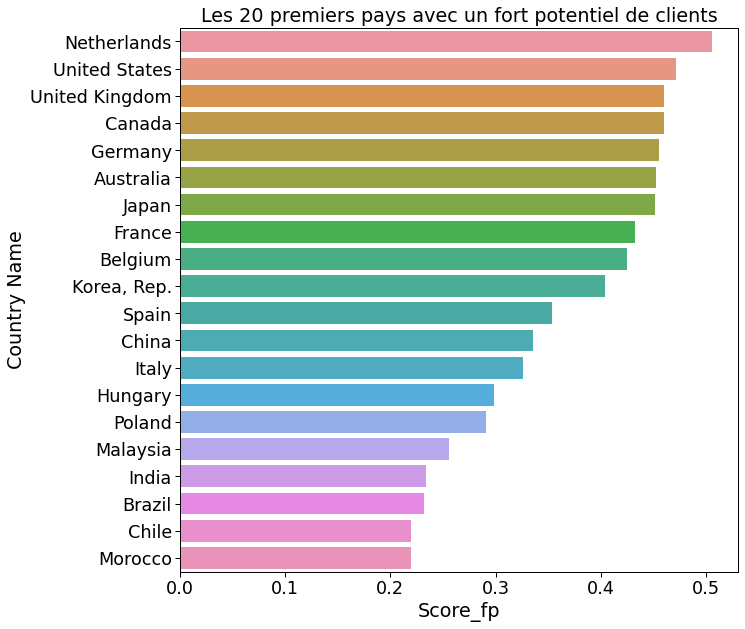

In [252]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)
plt.title("Les 20 premiers pays avec un fort potentiel de clients")
sns.barplot(data= fort_potentiel, x= 'Score_fp', y= 'Country Name')
plt.xlabel('Score_fp')

In [242]:
# On peut garder une liste de ces pays.
liste_pays=fort_potentiel['Country Name']
liste_pays=liste_pays.to_list()
print(liste_pays)

['Netherlands', 'United States', 'United Kingdom', 'Canada', 'Germany', 'Australia', 'Japan', 'France', 'Belgium', 'Korea, Rep.', 'Spain', 'China', 'Italy', 'Hungary', 'Poland', 'Malaysia', 'India', 'Brazil', 'Chile', 'Morocco']


## L'évolution des potentiels clients 

Les données sur le futur sont mals renseignées dans notre base de données. Pour analyser l'évolution des potentiels, nous étudirons les données renseignées de 2010 à 2015 sur l'utilisation d'internet et sur la démographie. 

In [320]:
#Sélection des pays à fort potentiel
table_pays=table_ind.loc[(table_ind['Country Name'].isin(liste_pays)),:]
table_pays.head(100)

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
129446,Australia,AUS,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.160520e+05,2.559560e+05,2.840190e+05,2.616280e+05,2.572000e+05,NaN
129489,Australia,AUS,"Enrolment in upper secondary education, both s...",UIS.E.3,9.909510e+05,1.040865e+06,1.088366e+06,1.079568e+06,1.104162e+06,NaN
129520,Australia,AUS,GDP per capita (current US$),NY.GDP.PCAP.CD,5.187408e+04,6.224510e+04,6.767763e+04,6.779230e+04,6.221461e+04,5.655404e+04
129650,Australia,AUS,Internet users (per 100 people),IT.NET.USER.P2,7.600000e+01,7.948770e+01,7.900000e+01,8.345350e+01,8.400000e+01,8.456052e+01
130757,Australia,AUS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.914315e+06,2.922445e+06,2.926388e+06,2.926254e+06,2.922207e+06,2.914620e+06
130828,Australia,AUS,Pupil-teacher ratio in tertiary education (hea...,UIS.PTRHC.56,NaN,NaN,NaN,2.747249e+01,NaN,NaN
158766,Belgium,BEL,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.647000e+04,2.977400e+04,2.764000e+04,6.197700e+04,7.035800e+04,NaN
158809,Belgium,BEL,"Enrolment in upper secondary education, both s...",UIS.E.3,5.287070e+05,5.206020e+05,5.113950e+05,7.736970e+05,7.764130e+05,NaN
158840,Belgium,BEL,GDP per capita (current US$),NY.GDP.PCAP.CD,4.438018e+04,4.770281e+04,4.474058e+04,4.658267e+04,4.737917e+04,4.037539e+04
158970,Belgium,BEL,Internet users (per 100 people),IT.NET.USER.P2,7.500000e+01,8.161000e+01,8.071999e+01,8.217020e+01,8.500000e+01,8.505290e+01


In [245]:
#création d'une liste à l'aide des indicateurs
indicateurs=['IT.NET.USER.P2' 'NY.GDP.PCAP.CD', 'SP.POP.1524.TO.UN', 'UIS.E.3',
       'UIS.E.4', 'UIS.PTRHC.56']

In [246]:
#création d'une liste à l'aide des colonnes
colonnes=table_pays.columns.tolist()
colonnes[4:]

['2010', '2011', '2012', '2013', '2014', '2015']

In [247]:
#transformation de la table en créant une varaible 'Year' regroupant les années:
table_années=table_pays.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = 
       ['2010', '2011', '2012', '2013', '2014', '2015'], var_name = 'Year',value_name = 'Value')

In [248]:
table_années['Year'] = table_années['Year'].astype('int32')
table_années.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Australia,AUS,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2010,2.160520e+05
1,Australia,AUS,"Enrolment in upper secondary education, both s...",UIS.E.3,2010,9.909510e+05
2,Australia,AUS,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,5.187408e+04
3,Australia,AUS,Internet users (per 100 people),IT.NET.USER.P2,2010,7.600000e+01
4,Australia,AUS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2010,2.914315e+06


C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3686181139.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(table_années[table_années['Indicator Code'] == 'IT.NET.USER.P2'][table_années['Country Name'] == pays ]['Year'],
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3686181139.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_années[table_années['Indicator Code'] == 'IT.NET.USER.P2'][table_années['Country Name'] == pays ]['Value'])
C:\Users\mr_ar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3686181139.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3686181139.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_années[table_années['Indicator Code'] == 'IT.NET.USER.P2'][table_années['Country Name'] == pays ]['Value'])
C:\Users\mr_ar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3686181139.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(table_années[table_années['Indicator Code'] == 'IT.NET.USER.P2'][table_années['Country Name'] == pays ]['Year'],
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3686181139.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

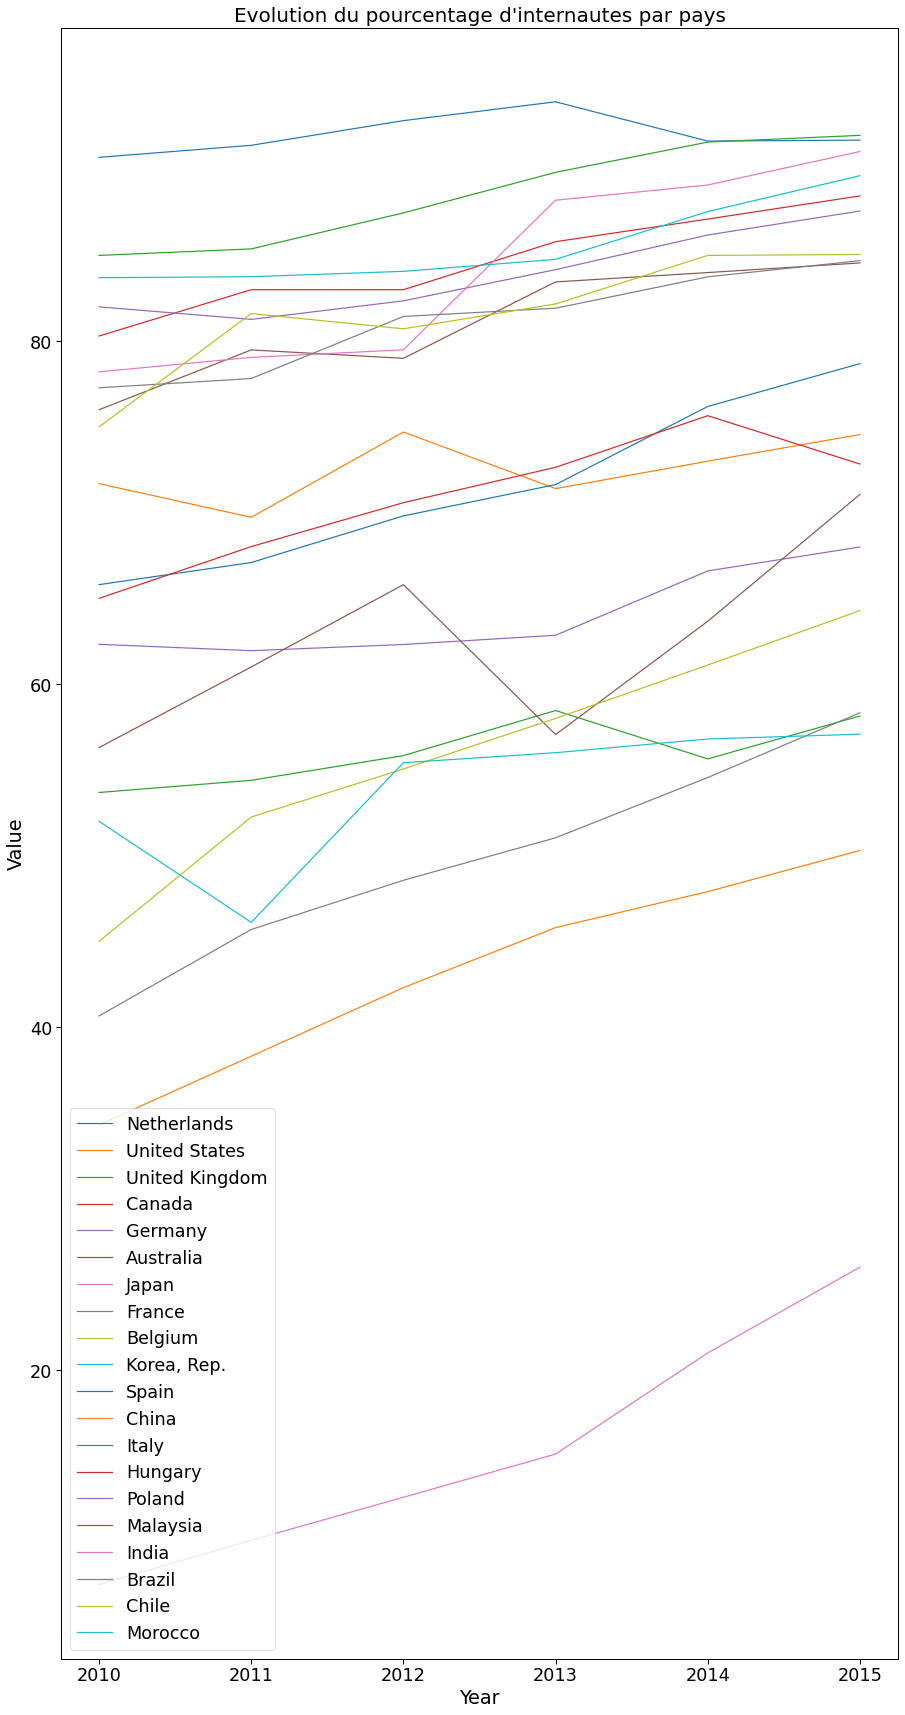

In [321]:
#On obtient le graphique suivant sur l'évolution des internautes par pays
plt.figure(figsize = (15,30))
for pays in liste_pays:
    sns.lineplot(table_années[table_années['Indicator Code'] == 'IT.NET.USER.P2'][table_années['Country Name'] == pays ]['Year'],
    table_années[table_années['Indicator Code'] == 'IT.NET.USER.P2'][table_années['Country Name'] == pays ]['Value'])
plt.legend(liste_pays, loc = 'lower left', )
plt.title('Evolution du pourcentage d\'internautes par pays', size=20)
plt.show()

C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3315554323.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(table_années[table_années['Indicator Code'] == 'UIS.E.3'][table_années['Country Name'] == pays ]['Year'],
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3315554323.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_années[table_années['Indicator Code'] == 'UIS.E.3'][table_années['Country Name'] == pays ]['Value'])
C:\Users\mr_ar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3315554323.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(

C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3315554323.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(table_années[table_années['Indicator Code'] == 'UIS.E.3'][table_années['Country Name'] == pays ]['Year'],
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3315554323.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_années[table_années['Indicator Code'] == 'UIS.E.3'][table_années['Country Name'] == pays ]['Value'])
C:\Users\mr_ar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\3315554323.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(

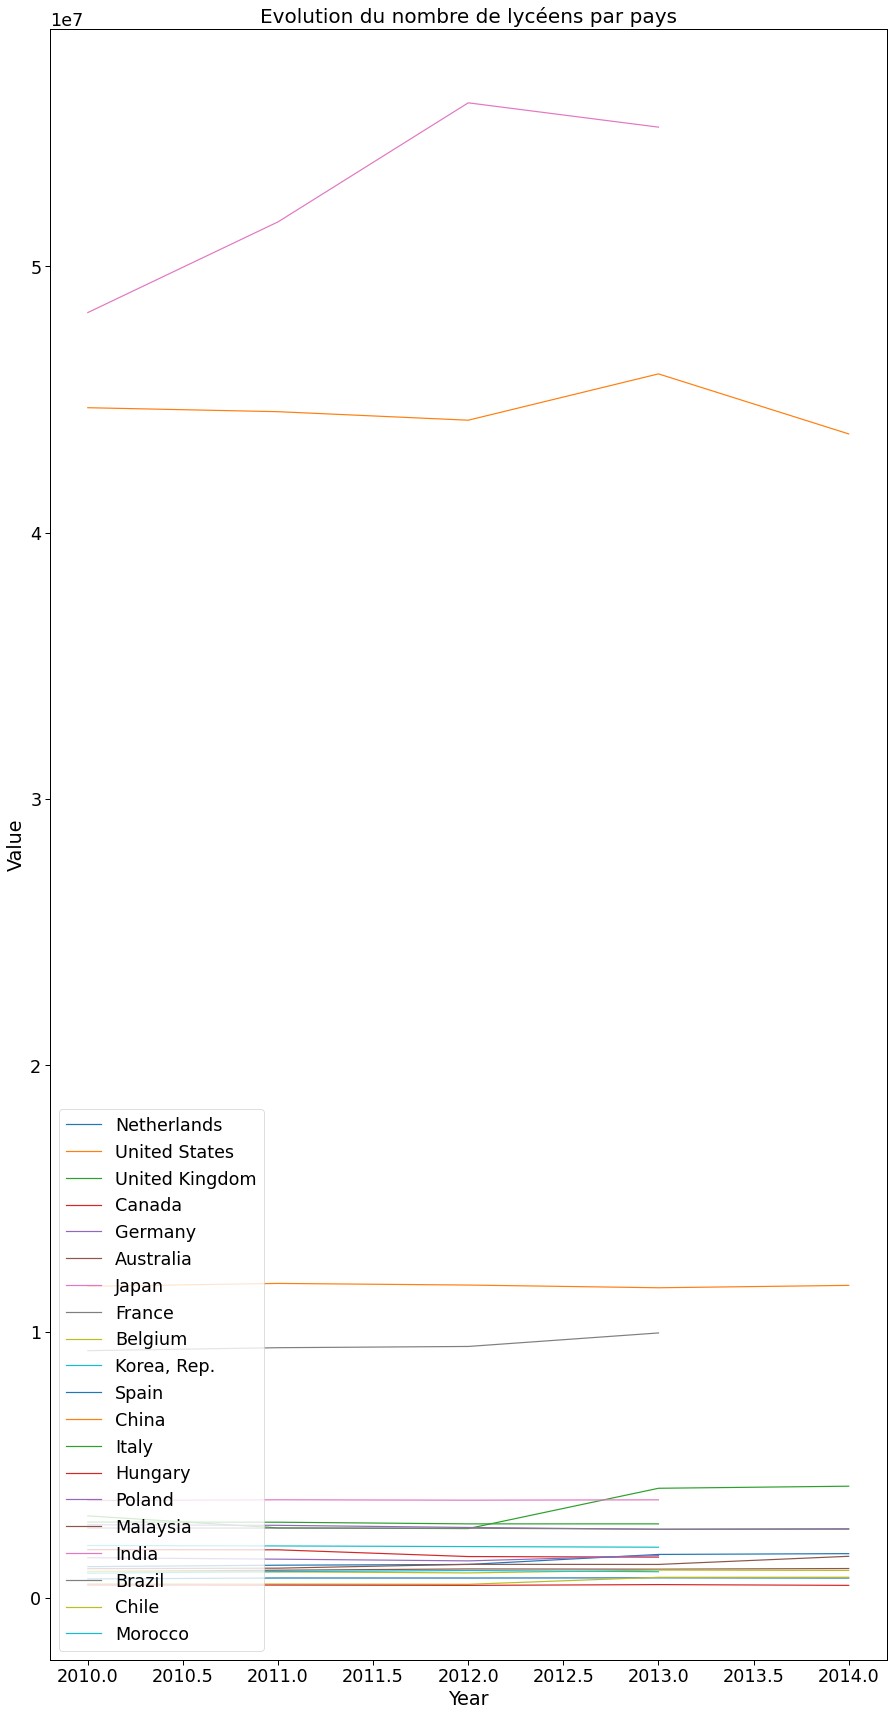

In [322]:
#On obtient le graphique suivant sur l'évolution des lycéens par pays
plt.figure(figsize = (15,30))
for pays in liste_pays:
    sns.lineplot(table_années[table_années['Indicator Code'] == 'UIS.E.3'][table_années['Country Name'] == pays ]['Year'],
    table_années[table_années['Indicator Code'] == 'UIS.E.3'][table_années['Country Name'] == pays ]['Value'])
plt.legend(liste_pays, loc = 'lower left', )
plt.title('Evolution du nombre de lycéens par pays', size=20)
plt.show()

C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\736866366.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(table_années[table_années['Indicator Code'] == 'UIS.E.4'][table_années['Country Name'] == pays ]['Year'],
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\736866366.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_années[table_années['Indicator Code'] == 'UIS.E.4'][table_années['Country Name'] == pays ]['Value'])
C:\Users\mr_ar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\736866366.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(tab

C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\736866366.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(table_années[table_années['Indicator Code'] == 'UIS.E.4'][table_années['Country Name'] == pays ]['Year'],
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\736866366.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_années[table_années['Indicator Code'] == 'UIS.E.4'][table_années['Country Name'] == pays ]['Value'])
C:\Users\mr_ar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_10188\736866366.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(tab

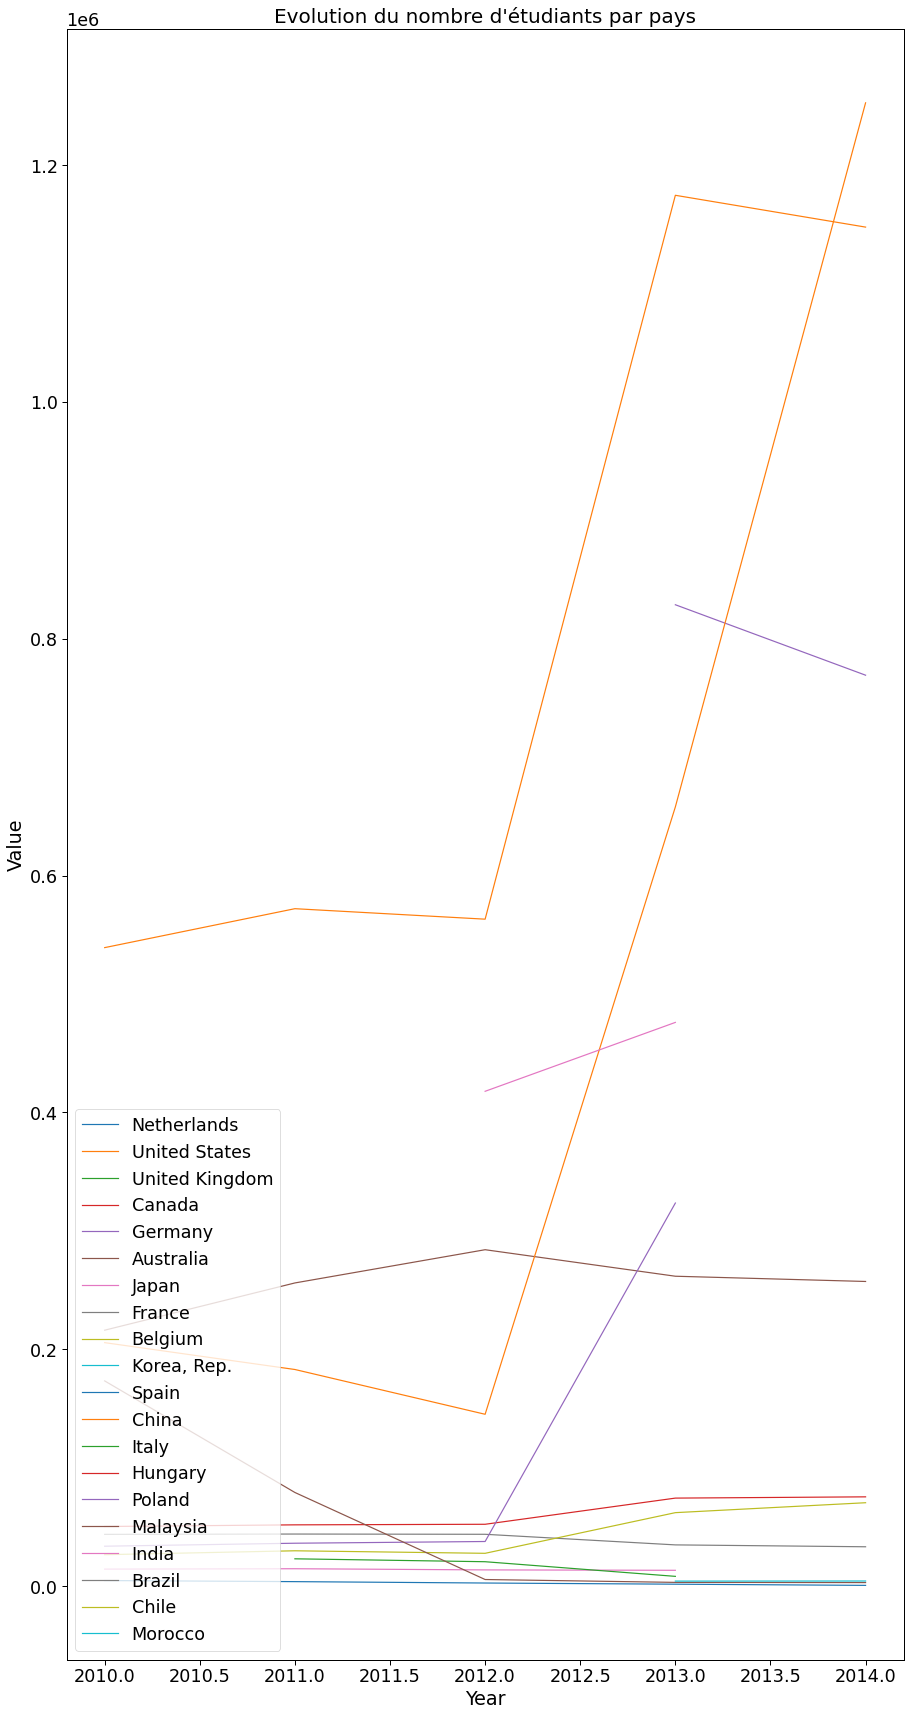

In [325]:
#On obtient le graphique suivant sur l'évolution d'étudiants par pays
plt.figure(figsize = (15,30))
for pays in liste_pays:
    sns.lineplot(table_années[table_années['Indicator Code'] == 'UIS.E.4'][table_années['Country Name'] == pays ]['Year'],
    table_années[table_années['Indicator Code'] == 'UIS.E.4'][table_années['Country Name'] == pays ]['Value'])
plt.legend(liste_pays, loc = 'lower left', )
plt.title("Evolution du nombre d'étudiants par pays", size=20)
plt.show()

On peut observer sur les graphiques précédents que sur les pays de notre liste:
- le pourcentage des utilisateurs d'internet n'a cessé d'augmenter dans la quasi totalité des pays.
- le taux de scolasation des lycéens et des étudiants reste constant.

On suppose donc que avec cette augamentation du nombre de personnes ayant accés à internet, notre entreprise verra sa part de marché augmentée au fil des années.
    

##### Dans quels pays l'entreprise doit-elle opérer en priorité ?

In [326]:
liste_pays

['Netherlands',
 'United States',
 'United Kingdom',
 'Canada',
 'Germany',
 'Australia',
 'Japan',
 'France',
 'Belgium',
 'Korea, Rep.',
 'Spain',
 'China',
 'Italy',
 'Hungary',
 'Poland',
 'Malaysia',
 'India',
 'Brazil',
 'Chile',
 'Morocco']

Les pays présents dans la liste ci-dessus sont selon nos analyse, les plus favorables à une implantation de notre entreprise à l'etranger.
Pour opérer en priorité, on peut cibler les 5 pays qui ont meilleurs 'score_fp', notre indicateur de sélection.

In [328]:
liste_pays[:5]

['Netherlands', 'United States', 'United Kingdom', 'Canada', 'Germany']